<a href="https://colab.research.google.com/github/danadler-dev/MDPI-Article-Evo/blob/main/HowInfoEvolves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gen 1: Counter({'A': 10, 'B': 10, 'C': 10})
Gen 2: Counter({'AB': 7, 'B': 6, 'BC': 6, 'C': 3, 'A': 2, 'AC': 1})
Gen 3: Counter({'BC': 11, 'AB': 10, 'B': 9, 'ABC': 8, 'C': 2, 'AC': 2})
Gen 4: Counter({'ABC': 18, 'BC': 12, 'AB': 11, 'B': 5, 'A': 2, 'C': 1})
Gen 5: Counter({'ABC': 26, 'AB': 18, 'BC': 11, 'B': 3, 'A': 1, 'C': 1})
Gen 6: Counter({'ABC': 38, 'AB': 13, 'BC': 10, 'B': 2, 'C': 1, 'A': 1})
Gen 7: Counter({'ABC': 52, 'AB': 11, 'BC': 9, 'A': 2, 'C': 2, 'B': 1})


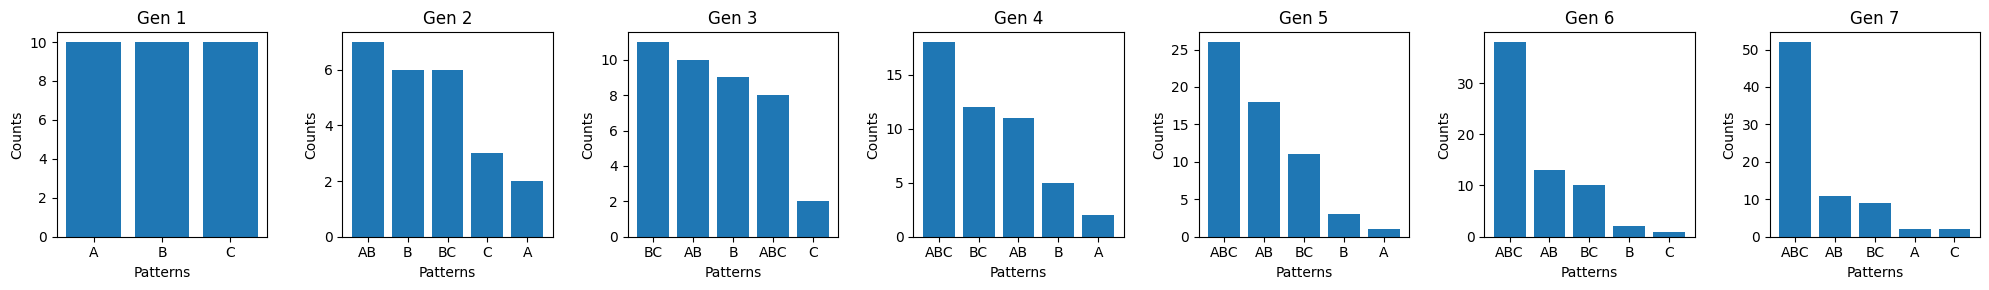

In [ ]:
import random
import matplotlib.pyplot as plt
from collections import Counter

def simulate_simple_case(num_generations, interactions_per_generation, regeneration_rate, initial_population):
    """
    Simulate a simple case with three elements {A, B, C} and stability bias for compounds involving B.

    Args:
        num_generations (int): Number of generations to simulate.
        interactions_per_generation (int): Number of interactions per generation.
        regeneration_rate (dict): Number of each base symbol regenerated each generation.
        initial_population (list): Initial population of symbols.

    Returns:
        None: Plots the dynamics of the population over generations.
    """
    # Stability values for compounds
    stability = {
        "AB": 3, "BC": 3, "ABC": 5,  # High stability for B-compounds
        "AC": 1, "A": 1, "B": 2, "C": 1  # Lower stability for others
    }

    population = initial_population.copy()

    fig, axes = plt.subplots(1, num_generations,figsize=(20, 3))
    axes = axes.flatten()

    for generation in range(num_generations):
       # Count and plot top patterns
        population_count = Counter(population)
        top_patterns = population_count.most_common(5)
        labels, counts = zip(*top_patterns) if top_patterns else ([], [])
        ax = axes[generation]
        ax.bar(labels, counts)
        ax.set_title(f"Gen {generation+1}")
        ax.set_xlabel("Patterns")
        ax.set_ylabel("Counts")

        # Regenerate base elements
        for symbol, rate in regeneration_rate.items():
            population.extend([symbol] * rate)

        # Simulate interactions
        new_population = []
        for _ in range(interactions_per_generation):
            symbol1, symbol2 = random.sample(population, 2)
            compound = "".join(sorted(symbol1 + symbol2))  # Sort to avoid duplicate representations
            if compound in stability:
                new_population.append(compound)
            else:
                # If the compound is invalid, add the original symbols back
                new_population.extend([symbol1, symbol2])

        # Age compounds by their stability
        aged_population = []
        for compound in new_population:
            if random.random() < (stability.get(compound, 0) / 5):  # Normalize by max stability
                aged_population.append(compound)
        population = aged_population



        print(f"Gen {generation+1}: {population_count}")

    # Hide unused subplot axes
    for i in range(num_generations, len(axes)):
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()


# Parameters for the simulation
num_generations = 7
interactions_per_generation = 50
regeneration_rate = {"A": 5, "B": 5, "C": 5}  # Regenerate all elements equally
initial_population = ["A", "B", "C"] * 10  # Initial population of base elements

# Run the simulation
simulate_simple_case(num_generations, interactions_per_generation, regeneration_rate, initial_population)


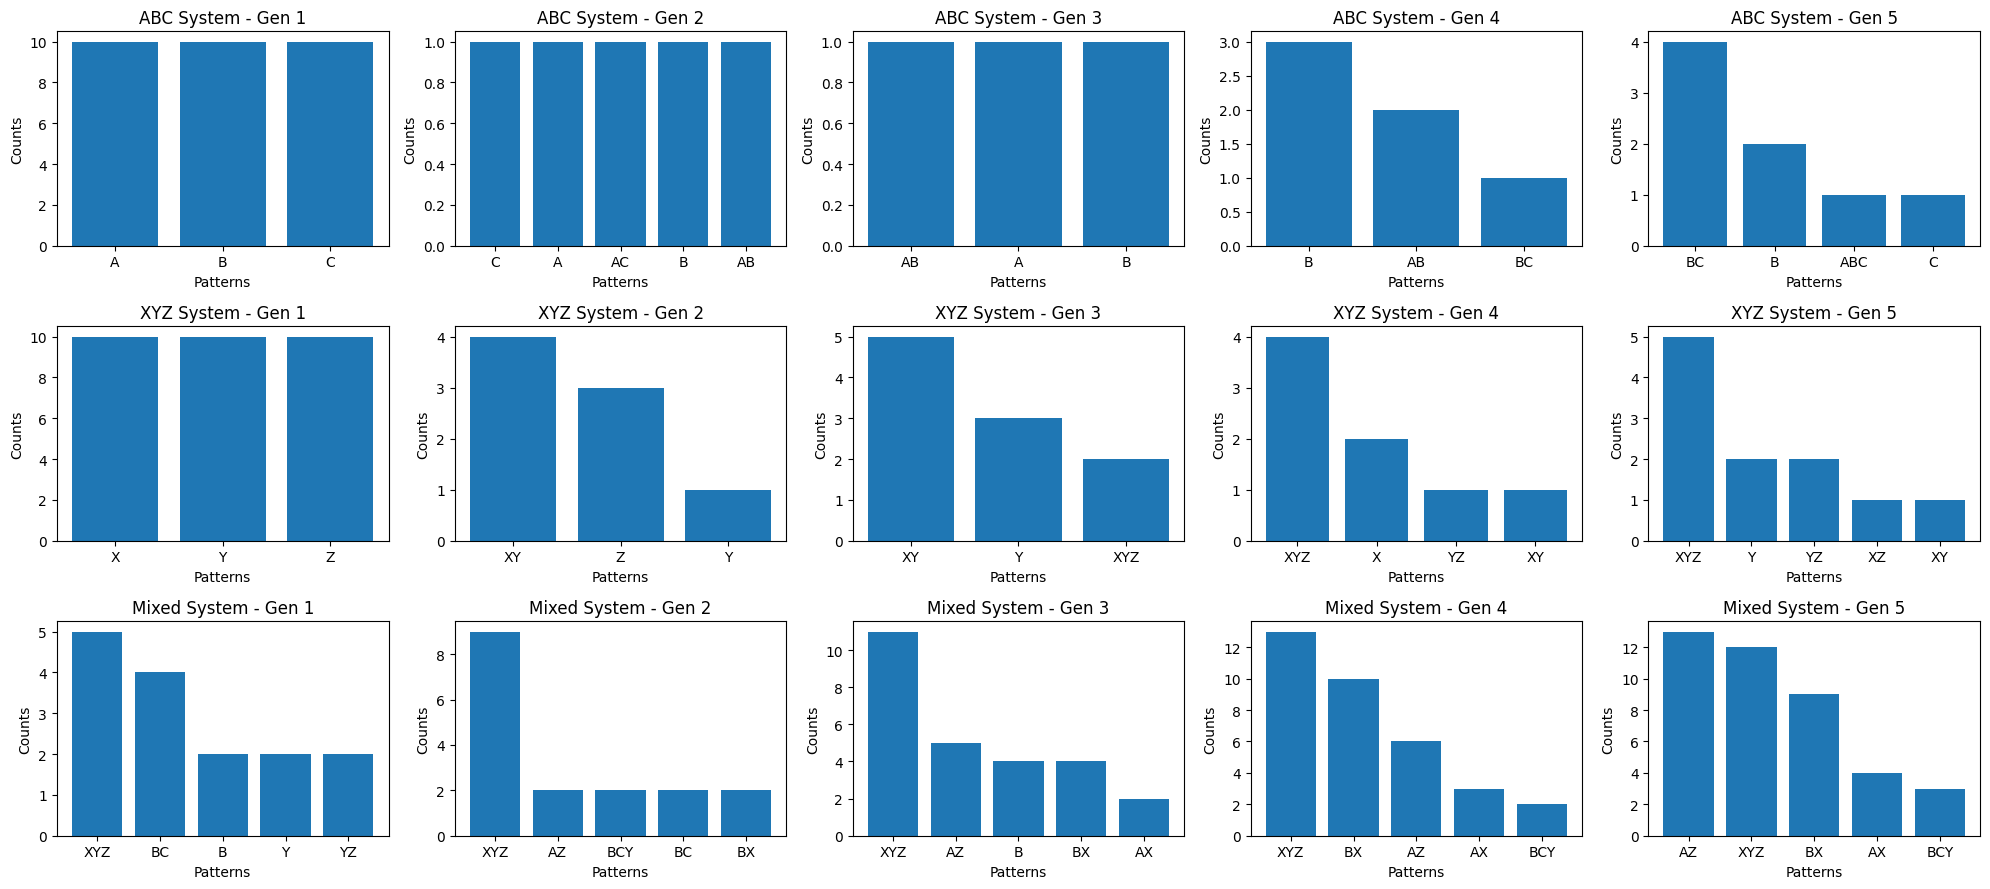

In [13]:
import random
import matplotlib.pyplot as plt
from collections import Counter

# Function to simulate a population system
def simulate_population(num_generations, interactions_per_generation, regeneration_rate, initial_population, stability):
    """
    Simulate a population with given stability constraints and regeneration rules.

    Args:
        num_generations (int): Number of generations to simulate.
        interactions_per_generation (int): Number of interactions per generation.
        regeneration_rate (dict): Number of each base symbol regenerated each generation.
        initial_population (list): Initial population of symbols.
        stability (dict): Stability values for compounds.

    Returns:
        list: Population history over generations.
    """
    population = initial_population.copy()
    population_history = []

    for generation in range(num_generations):
        population_history.append(Counter(population))  # Save population count for this generation

        # Regenerate base elements
        for symbol, rate in regeneration_rate.items():
            population.extend([symbol] * rate)

        # Simulate interactions
        new_population = []
        for _ in range(interactions_per_generation):
            symbol1, symbol2 = random.sample(population, 2)
            compound = "".join(sorted(symbol1 + symbol2))  # Sort to avoid duplicate representations
            if compound in stability:
                new_population.append(compound)
            else:
                new_population.extend([symbol1, symbol2])

        # Age compounds by their stability
        aged_population = []
        for compound in new_population:
            if random.random() < (stability.get(compound, 0) / 20):  # Normalize by max stability (20 in this case)
                aged_population.append(compound)
        population = aged_population

    return population_history

# Function to plot population histories
def plot_population_histories(histories, titles):
    fig, axes = plt.subplots(len(histories), num_generations, figsize=(20, len(histories) * 3))
    if len(histories) == 1:
        axes = [axes]
    for row, (history, title) in enumerate(zip(histories, titles)):
        for generation, population_count in enumerate(history):
            top_patterns = population_count.most_common(5)  # Top 5 patterns
            labels, counts = zip(*top_patterns) if top_patterns else ([], [])
            axes[row][generation].bar(labels, counts)
            axes[row][generation].set_title(f"{title} - Gen {generation + 1}")
            axes[row][generation].set_xlabel("Patterns")
            axes[row][generation].set_ylabel("Counts")
    plt.tight_layout()
    plt.show()

# Parameters for simulation
num_generations = 5
interactions_per_generation = 50

# Define ABC population parameters
abc_stability = {"AB": 3, "BC": 3, "ABC": 5, "AC": 1, "A": 1, "B": 2, "C": 1}
abc_regeneration_rate = {"A": 5, "B": 5, "C": 5}
abc_initial_population = ["A", "B", "C"] * 10

# Define XYZ population parameters
xyz_stability = {"XY": 3, "YZ": 3, "XYZ": 5, "XZ": 1, "X": 1, "Y": 2, "Z": 1}
xyz_regeneration_rate = {"X": 5, "Y": 5, "Z": 5}
xyz_initial_population = ["X", "Y", "Z"] * 10

# Simulate individual populations
abc_history = simulate_population(num_generations, interactions_per_generation, abc_regeneration_rate, abc_initial_population, abc_stability)
xyz_history = simulate_population(num_generations, interactions_per_generation, xyz_regeneration_rate, xyz_initial_population, xyz_stability)

# Prepare the mixed initial population from the last generations of ABC and XYZ histories
mixed_initial_population = list(abc_history[-1].elements()) + list(xyz_history[-1].elements())

# Define maximized stability constraints for the mixed system
maximized_mixed_stability = {
    **abc_stability,
    **xyz_stability,
    # Maximize cross-system interaction stability
    "ABX": 15, "BCY": 15, "CXY": 15, "AYZ": 15, "XZB": 15, "XYZ": 12, "ACZ": 12,
    "AX": 20, "BX": 18, "CY": 18, "AY": 20, "AZ": 20  # Maximum stability between ABC and XYZ elements
}

# Simulate the mixed population with maximized stability
mixed_history_maximized_mixed = simulate_population(
    num_generations, interactions_per_generation,
    {**abc_regeneration_rate, **xyz_regeneration_rate},
    mixed_initial_population, maximized_mixed_stability
)

# Plot the results
plot_population_histories(
    [abc_history, xyz_history, mixed_history_maximized_mixed],
    ["ABC System", "XYZ System", "Mixed System"]
)


CA Rules

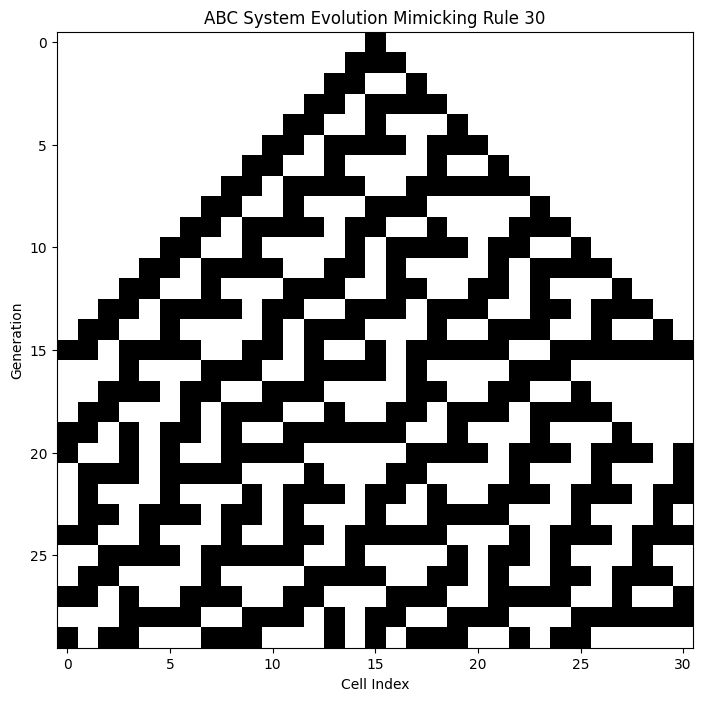

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_abc_system(size):
    """
    Initializes an ABC system with a single 'B' element at the center.

    Parameters:
        size (int): Number of cells in the system.

    Returns:
        list: Initial state of the system.
    """
    state = ['A'] * size
    state[size // 2] = 'B'  # Place a single 'B' in the center
    return state

def evolve_abc_system_with_stability(state, generations, stability_rules):
    """
    Evolves an ABC system based on stability rules over generations.

    Parameters:
        state (list): Initial state of the system.
        generations (int): Number of generations to simulate.
        stability_rules (dict): Stability rules based on patterns and their priority outcomes.

    Returns:
        np.ndarray: Array representing the evolution of the system.
    """
    size = len(state)
    evolution = []
    evolution.append(state)

    for _ in range(generations - 1):
        new_state = []
        for i in range(size):
            left = state[(i - 1) % size]  # Wrap around for periodic boundaries
            center = state[i]
            right = state[(i + 1) % size]
            triplet = (left, center, right)

            # Apply the stability rules
            # Rules implicitly encode stability, e.g., S(A, B) = 0.9 means triplets involving 'A' and 'B'
            # prioritize 'B' as the next state. Similarly, S(B, C) = 0.7 biases towards retaining 'B'.
            if triplet in stability_rules:
                new_state.append(stability_rules[triplet])
            else:
                # Default to maintaining the current state if no explicit rule applies
                new_state.append(center)

        evolution.append(new_state)
        state = new_state

    return np.array(evolution)

def plot_abc_system_with_stability(evolution):
    """
    Plots the evolution of an ABC system.

    Parameters:
        evolution (np.ndarray): Array representing the evolution of the system.
    """
    evolution_numeric = np.array([[ord(cell) for cell in row] for row in evolution])
    plt.figure(figsize=(12, 8))
    plt.imshow(evolution_numeric, cmap='binary', interpolation='none')
    plt.title("ABC System Evolution Mimicking Rule 30")
    plt.xlabel("Cell Index")
    plt.ylabel("Generation")
    plt.show()

# Define stability rules based on patterns (mimicking Rule 30 logic)
# Stability rules reflect the idea of S(A, B) = 0.9 or S(B, C) = 0.7.
# For example:
# ('A', 'B', 'A') -> 'B' reflects the strong stability of B when interacting with A.
# ('B', 'A', 'B') -> 'B' reflects the preference for B due to higher S(B, A).
stability_rules = {
    ('B', 'B', 'B'): 'A',  # Lower stability for entirely 'B' compounds
    ('B', 'B', 'A'): 'A',
    ('B', 'A', 'B'): 'A',
    ('B', 'A', 'A'): 'B',  # Higher stability for mixed compounds favoring 'B'
    ('A', 'B', 'B'): 'B',
    ('A', 'B', 'A'): 'B',
    ('A', 'A', 'B'): 'B',
    ('A', 'A', 'A'): 'A',  # Default to 'A' for low-stability interactions
}

# Initialize the ABC system
size = 31  # Size of the system (odd to center the 'B')
generations = 30
initial_state = initialize_abc_system(size)

# Simulate the ABC system mimicking Rule 30 with stability rules
evolution = evolve_abc_system_with_stability(initial_state, generations, stability_rules)

# Plot the evolution of the ABC system
plot_abc_system_with_stability(evolution)


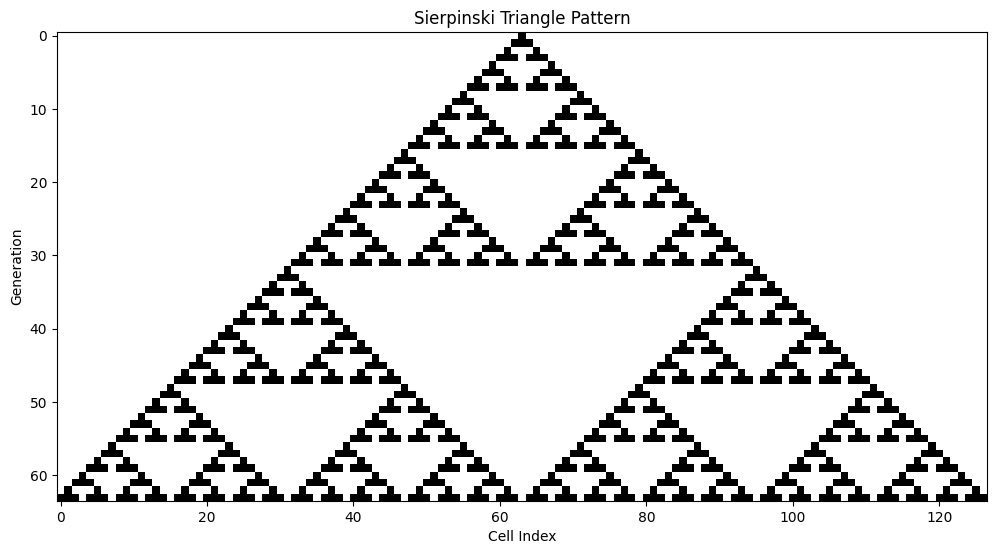

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_fractal_system(size):
    """
    Initializes a system for generating a fractal pattern, with a single 'A' at the center.

    Parameters:
        size (int): Number of cells in the system.

    Returns:
        list: Initial state of the system.
    """
    state = ['B'] * size  # Start with all 'B'
    state[size // 2] = 'A'  # Place a single 'A' in the center
    return state

def evolve_fractal_system_sierpinski(state, generations):
    """
    Evolves a system based on Sierpinski-like fractal rules over generations.

    Parameters:
        state (list): Initial state of the system.
        generations (int): Number of generations to simulate.

    Returns:
        np.ndarray: Array representing the evolution of the system.
    """
    size = len(state)
    evolution = []
    evolution.append(state)

    for _ in range(generations - 1):
        new_state = []
        for i in range(size):
            left = state[(i - 1) % size]  # Wrap around for periodic boundaries
            center = state[i]
            right = state[(i + 1) % size]

            # Sierpinski rule: A cell is active if exactly one of its neighbors or itself is active
            active_count = (left == 'A') + (center == 'A') + (right == 'A')
            if active_count == 1:
                new_state.append('A')
            else:
                new_state.append('B')

        evolution.append(new_state)
        state = new_state

    return np.array(evolution)

def plot_fractal_system(evolution):
    """
    Plots the evolution of a fractal-like system.

    Parameters:
        evolution (np.ndarray): Array representing the evolution of the system.
    """
    # Convert 'A' and 'B' to numeric values for visualization
    evolution_numeric = np.array([[1 if cell == 'A' else 0 for cell in row] for row in evolution])
    plt.figure(figsize=(12, 8))
    plt.imshow(evolution_numeric, cmap='binary', interpolation='none')
    plt.title("Sierpinski Triangle Pattern")
    plt.xlabel("Cell Index")
    plt.ylabel("Generation")
    plt.show()

# Initialize the system
size = 127  # Size must be a power of 2 minus 1 for clear Sierpinski structure
generations = 64  # Number of generations to simulate
initial_state = initialize_fractal_system(size)

# Simulate the fractal system
evolution = evolve_fractal_system_sierpinski(initial_state, generations)

# Plot the evolution of the fractal system
plot_fractal_system(evolution)


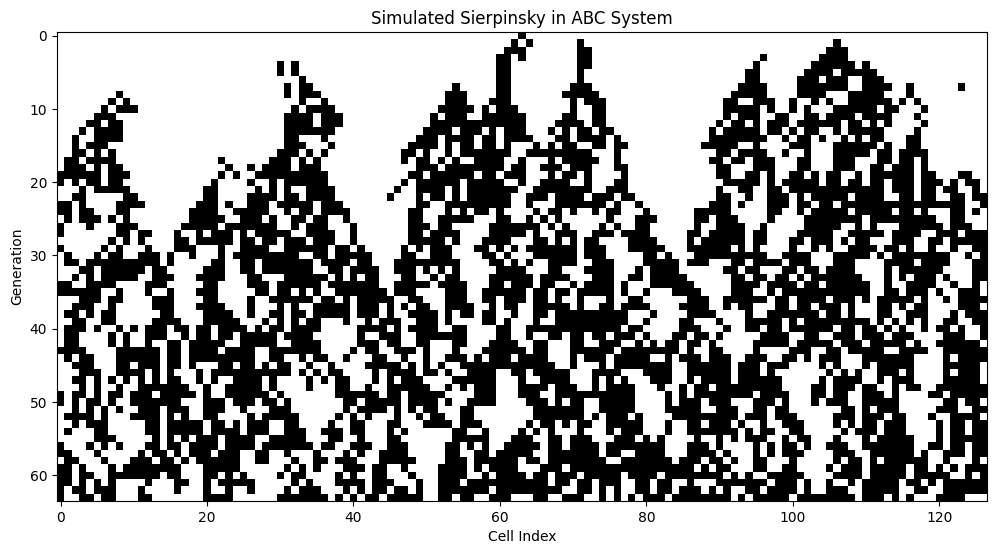

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

def initialize_fractal_system(size):
    """
    Initializes a system for generating a fractal pattern, with a single 'A' at the center.

    Parameters:
        size (int): Number of cells in the system.

    Returns:
        list: Initial state of the system.
    """
    state = ['B'] * size  # Start with all 'B'
    state[size // 2] = 'A'  # Place a single 'A' in the center
    return state

def evolve_fractal_with_positional_stability(state, generations, stability_rules, mutation_rate=0.01):
    """
    Evolves a system based on stability rules with positional dependencies.

    Parameters:
        state (list): Initial state of the system.
        generations (int): Number of generations to simulate.
        stability_rules (dict): Positional stability scores for interactions.
        mutation_rate (float): Probability of random mutation in state transitions.

    Returns:
        np.ndarray: Array representing the evolution of the system.
    """
    size = len(state)
    evolution = []
    evolution.append(state)

    for _ in range(generations - 1):
        new_state = []
        for i in range(size):
            left = state[(i - 1) % size]  # Wrap around for periodic boundaries
            center = state[i]
            right = state[(i + 1) % size]
            triplet = (left, center, right)

            # Compute probabilities based on positional stability
            if triplet in stability_rules:
                stability_left = stability_rules[triplet]['left']
                stability_center = stability_rules[triplet]['center']
                stability_right = stability_rules[triplet]['right']
                total_stability = stability_left + stability_center + stability_right

                # Positional decision based on stability
                rand_choice = random.random() * total_stability
                if rand_choice < stability_left:
                    new_state.append('A')
                elif rand_choice < stability_left + stability_center:
                    new_state.append('A')
                else:
                    new_state.append('B')
            else:
                new_state.append(center)  # Default to maintaining the current state

            # Apply random mutation
            if random.random() < mutation_rate:
                new_state[-1] = 'A' if new_state[-1] == 'B' else 'B'

        evolution.append(new_state)
        state = new_state

    return np.array(evolution)

def plot_fractal_system(evolution):
    """
    Plots the evolution of a fractal-like system.

    Parameters:
        evolution (np.ndarray): Array representing the evolution of the system.
    """
    evolution_numeric = np.array([[1 if cell == 'A' else 0 for cell in row] for row in evolution])
    plt.figure(figsize=(12, 8))
    plt.imshow(evolution_numeric, cmap='binary', interpolation='none')
    plt.title("Simulated Sierpinsky in ABC System")
    plt.xlabel("Cell Index")
    plt.ylabel("Generation")
    plt.show()

# Define positional stability rules
positional_stability_rules = {
    ('A', 'A', 'A'): {'left': 0.9, 'center': 0.8, 'right': 0.7},
    ('A', 'A', 'B'): {'left': 0.7, 'center': 0.9, 'right': 0.6},
    ('A', 'B', 'A'): {'left': 0.5, 'center': 0.6, 'right': 0.8},
    ('A', 'B', 'B'): {'left': 0.2, 'center': 0.3, 'right': 0.5},
    ('B', 'A', 'A'): {'left': 0.6, 'center': 0.7, 'right': 0.4},
    ('B', 'A', 'B'): {'left': 0.3, 'center': 0.4, 'right': 0.6},
    ('B', 'B', 'A'): {'left': 0.1, 'center': 0.2, 'right': 0.3},
    ('B', 'B', 'B'): {'left': 0.0, 'center': 0.0, 'right': 0.0},  # Ensure 'B' is dominant here
}

# Initialize the system
size = 127  # Larger size for better fractal visualization
generations = 64  # Number of generations to simulate
initial_state = initialize_fractal_system(size)

# Simulate the fractal system with positional stability
positional_evolution = evolve_fractal_with_positional_stability(initial_state, generations, positional_stability_rules)

# Plot the evolution of the fractal system with positional stability
plot_fractal_system(positional_evolution)
